### Data Cleaning and EDA
---

#### Import Libraries and Data Load

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roshrav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Extract data from combined_df csv
comb_df = pd.read_csv(r'./data/combined_df.csv')

In [3]:
# Display data set
comb_df.head()

,Unnamed: 0,authors,title,body,category
0,0,t3_cyee69,Formal posting guidelines for political topics...,"Alright everyone, it looks like we had pretty ...",investing
1,1,t3_gjl4ar,Daily Advice Thread - All basic help or advice...,"If your question is ""I have $10,000, what do I...",investing
2,2,t3_gjllle,An Additional 2.98 Million People Filed for Un...,[https://www.dol.gov/ui/data.pdf](https://www...,investing
3,3,t3_gje85k,"Don't wait for Buffett to give an ""all clear"" ...",[https://www.cnbc.com/id/31526130](https://www...,investing
4,4,t3_giytgu,Fed Chairman Jerome Powell paints a grim econo...,Powell in a speech this morning gave a [decide...,investing


In [4]:
# Drop Unnamed: 0 column
# Remove first 2 rows, as its the guidelines and advice on posting thread
comb_df.drop(['Unnamed: 0'], axis = 1, inplace= True)
comb_df = comb_df.iloc[2:]
comb_df.reset_index(drop=True, inplace=True)

In [5]:
# Check to see amendment has been made
comb_df.head()

,authors,title,body,category
0,t3_gjllle,An Additional 2.98 Million People Filed for Un...,[https://www.dol.gov/ui/data.pdf](https://www...,investing
1,t3_gje85k,"Don't wait for Buffett to give an ""all clear"" ...",[https://www.cnbc.com/id/31526130](https://www...,investing
2,t3_giytgu,Fed Chairman Jerome Powell paints a grim econo...,Powell in a speech this morning gave a [decide...,investing
3,t3_gj4i1u,[WSJ] Uber Eats are losing money on delivery o...,https://www.wsj.com/articles/america-is-stuck-...,investing
4,t3_gjl09q,"NCLH misses earnings expectations, reports eno...",This one should be fun to watch today. They w...,investing


#### Data Cleaning

In [6]:
# Check for null values
comb_df.isnull().sum()

authors     0
title       0
body        2
category    0
dtype: int64

In [7]:
# Fill the null values with empty quotes
comb_df.fillna('', inplace=True)

In [8]:
# Check shape and dtype
# Confirm if there's no null
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 4 columns):
authors     1742 non-null object
title       1742 non-null object
body        1742 non-null object
category    1742 non-null object
dtypes: object(4)
memory usage: 54.5+ KB


In [9]:
# Overview of the number of post by category
comb_df['category'].value_counts()

personalfinance    897
investing          845
Name: category, dtype: int64

In [10]:
# Function to clean data in title and body columns
# https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
def data_clean(texts):
    # remove url
    texts = re.sub(r"http\S+", "", texts)
    # remove html tags
    review_text = BeautifulSoup(texts).get_text()
    # remove everything that isn't letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    # convert text to lowercase
    letters_lower = letters_only.lower()
    # And split by space
    letters_split = letters_lower.split()
    # convert stopwords from a list to a set
    stops = set(stopwords.words('english'))
    # remove stopwords from data set
    new_words = [i for i in letters_split if i not in stops]
    # lemmatized the texts 
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in new_words]
    # Join the words back into one string separated by space and return the results
    return (" ".join(lem_words))

In [11]:
# Apply data_clean function to a new title and body
comb_df['title_clean'] = comb_df['title'].apply(lambda i: data_clean(i))
comb_df['body_clean'] = comb_df['body'].apply(lambda i: data_clean(i))

In [12]:
# Display the new data
comb_df.head(10)

,authors,title,body,category,title_clean,body_clean
0,t3_gjllle,An Additional 2.98 Million People Filed for Un...,[https://www.dol.gov/ui/data.pdf](https://www...,investing,additional million people filed unemployment week,x b week ending may advance figure seasonally ...
1,t3_gje85k,"Don't wait for Buffett to give an ""all clear"" ...",[https://www.cnbc.com/id/31526130](https://www...,investing,wait buffett give clear signal stock economy l...,buffett everything see economy bounce term eco...
2,t3_giytgu,Fed Chairman Jerome Powell paints a grim econo...,Powell in a speech this morning gave a [decide...,investing,fed chairman jerome powell paint grim economic...,powell speech morning gave decidedly negative ...
3,t3_gj4i1u,[WSJ] Uber Eats are losing money on delivery o...,https://www.wsj.com/articles/america-is-stuck-...,investing,wsj uber eats losing money delivery order bare...,coronavirus pandemic handed food delivery comp...
4,t3_gjl09q,"NCLH misses earnings expectations, reports eno...",This one should be fun to watch today. They w...,investing,nclh miss earnings expectation report enough l...,one fun watch today much currently feeling goi...
5,t3_gj7oux,Hertz reportedly having cars repossessed from ...,Here's a link: [https://www.thelayoff.com/t/14...,investing,hertz reportedly car repossessed location,link tldr hertz employee reporting car activel...
6,t3_gji5lg,Global funds invest more in China as coronavir...,&gt;As U.S. stocks plunged to three-year lows...,investing,global fund invest china coronavirus spread re...,u stock plunged three year low march allocatio...
7,t3_gj76g7,(WSJ) JPMorgan Extends Banking Services to Bit...,https://www.wsj.com/articles/jpmorgan-extends-...,investing,wsj jpmorgan extends banking service bitcoin e...,
8,t3_gj5zh4,Unpopular Opinion or just Objective Fact? Doll...,1st: this entire post is from the perspective ...,investing,unpopular opinion objective fact dollar cost a...,st entire post perspective capital available d...
9,t3_gjcr8n,"[LATimes] Uber offers to buy Grubhub, plans to...",https://www.latimes.com/business/story/2020-05...,investing,latimes uber offer buy grubhub plan sell bond,uber technology inc made offer acquire grubhub...


In [13]:
# Remove strings with one/two letters in title_clean and body_clean
# And combine the columns
comb_df['title_clean'] = comb_df['title_clean'].str.replace(r'\b\w\b','').str.replace(r'\b\w\w\b','').str.replace(r'\s+', ' ')
comb_df['body_clean'] = comb_df['body_clean'].str.replace(r'\b\w\b','').str.replace(r'\b\w\w\b','').str.replace(r'\s+', ' ')
comb_df['total_clean'] = comb_df['title_clean'] + ' ' + comb_df['body_clean']

In [14]:
# Remove "Hey and hello" from the total clean column
comb_df['total_clean'] = comb_df['total_clean'].str.replace('hey','').str.replace('hello','')

In [15]:
# Check to see if the amendment has been made
comb_df.head(10)

,authors,title,body,category,title_clean,body_clean,total_clean
0,t3_gjllle,An Additional 2.98 Million People Filed for Un...,[https://www.dol.gov/ui/data.pdf](https://www...,investing,additional million people filed unemployment week,week ending may advance figure seasonally adj...,additional million people filed unemployment w...
1,t3_gje85k,"Don't wait for Buffett to give an ""all clear"" ...",[https://www.cnbc.com/id/31526130](https://www...,investing,wait buffett give clear signal stock economy l...,buffett everything see economy bounce term eco...,wait buffett give clear signal stock economy l...
2,t3_giytgu,Fed Chairman Jerome Powell paints a grim econo...,Powell in a speech this morning gave a [decide...,investing,fed chairman jerome powell paint grim economic...,powell speech morning gave decidedly negative ...,fed chairman jerome powell paint grim economic...
3,t3_gj4i1u,[WSJ] Uber Eats are losing money on delivery o...,https://www.wsj.com/articles/america-is-stuck-...,investing,wsj uber eats losing money delivery order bare...,coronavirus pandemic handed food delivery comp...,wsj uber eats losing money delivery order bare...
4,t3_gjl09q,"NCLH misses earnings expectations, reports eno...",This one should be fun to watch today. They w...,investing,nclh miss earnings expectation report enough l...,one fun watch today much currently feeling goi...,nclh miss earnings expectation report enough l...
5,t3_gj7oux,Hertz reportedly having cars repossessed from ...,Here's a link: [https://www.thelayoff.com/t/14...,investing,hertz reportedly car repossessed location,link tldr hertz employee reporting car activel...,hertz reportedly car repossessed location link...
6,t3_gji5lg,Global funds invest more in China as coronavir...,&gt;As U.S. stocks plunged to three-year lows...,investing,global fund invest china coronavirus spread re...,stock plunged three year low march allocation...,global fund invest china coronavirus spread re...
7,t3_gj76g7,(WSJ) JPMorgan Extends Banking Services to Bit...,https://www.wsj.com/articles/jpmorgan-extends-...,investing,wsj jpmorgan extends banking service bitcoin e...,,wsj jpmorgan extends banking service bitcoin e...
8,t3_gj5zh4,Unpopular Opinion or just Objective Fact? Doll...,1st: this entire post is from the perspective ...,investing,unpopular opinion objective fact dollar cost a...,entire post perspective capital available day...,unpopular opinion objective fact dollar cost a...
9,t3_gjcr8n,"[LATimes] Uber offers to buy Grubhub, plans to...",https://www.latimes.com/business/story/2020-05...,investing,latimes uber offer buy grubhub plan sell bond,uber technology inc made offer acquire grubhub...,latimes uber offer buy grubhub plan sell bond ...


#### Exploratory Data Analysis


In [16]:
# Organizing the texts as per Category 
investing = comb_df.loc[comb_df.category == 'investing', 'total_clean']
personalfinance = comb_df.loc[comb_df.category == 'personalfinance', 'total_clean']

In [17]:
def word_cloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title(title, fontsize = 24)
    plt.show()

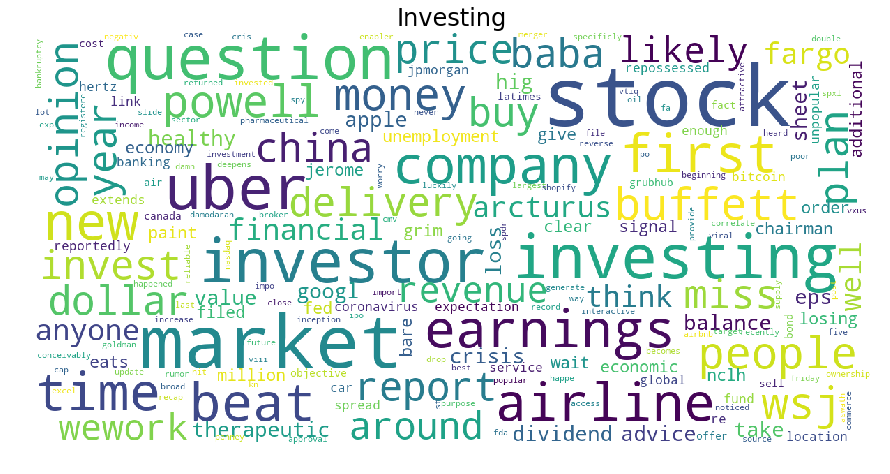

In [18]:
word_cloud(investing,'Investing')

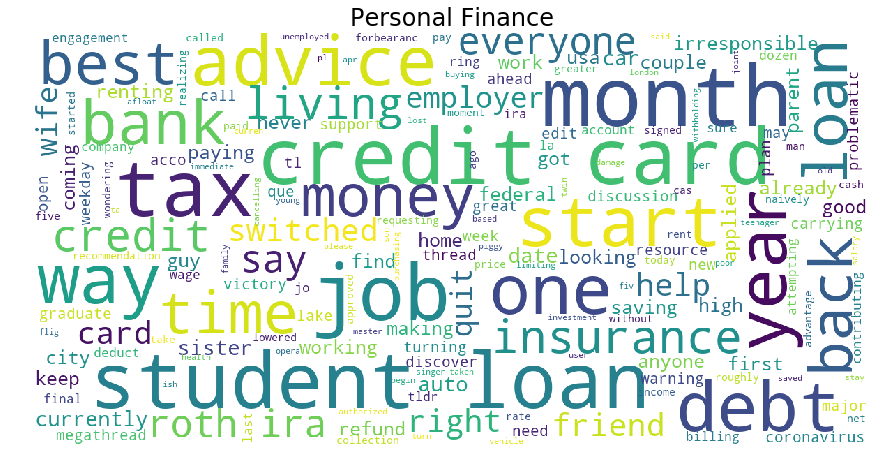

In [19]:
word_cloud(personalfinance,'Personal Finance')

In [20]:
cvec = CountVectorizer(stop_words='english')
cvec_personal_finance = pd.DataFrame(cvec.fit_transform(comb_df[comb_df['category']=='personalfinance']['total_clean']).todense(),
                       columns=cvec.get_feature_names())
cvec_investing = pd.DataFrame(cvec.fit_transform(comb_df[comb_df['category']=='investing']['total_clean']).todense(),
                       columns=cvec.get_feature_names())

In [21]:
# Retrieve the top 20 words
cvec_personal_fin20 = cvec_personal_finance.sum().sort_values(ascending=False).head(20)
cvec_investing_20 = cvec_investing.sum().sort_values(ascending=False).head(20)

Text(0.5, 1.0, 'Top 20 Common Words in Personal Finance')

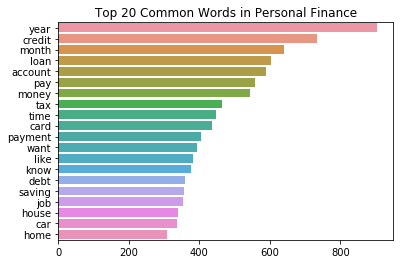

In [22]:
# Plot the top 20 words in barchart for personal finance
sns.barplot(y=cvec_personal_fin20.index.values, x=cvec_personal_fin20).set_title('Top 20 Common Words in Personal Finance')

Text(0.5, 1.0, 'Top 20 Common Words in Investing')

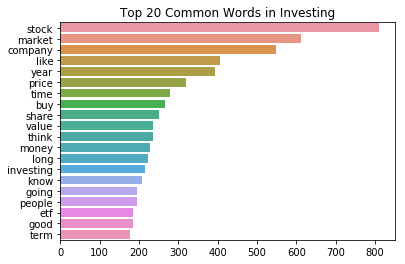

In [23]:
# Plot the top 20 words in barchart for investing
sns.barplot(y=cvec_investing_20.index.values, x=cvec_investing_20).set_title('Top 20 Common Words in Investing')

In [24]:
# Save the clean data set to csv
comb_df.to_csv(r'.\data\combined_clean.csv', index=False)